In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [88]:
df=pd.read_csv('/content/sample_data/loan_data.csv')

# New Section

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [90]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122,360.0,1.0,Semiurban,Y
24,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100,NaN,0.0,Urban,N
83,LP001478,Male,No,0,Graduate,No,2718,0.0,70,360.0,1.0,Semiurban,Y
237,LP002224,Male,No,0,Graduate,No,3069,0.0,71,480.0,1.0,Urban,N
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
205,LP002053,Male,Yes,3+,Graduate,No,4342,189.0,124,360.0,1.0,Semiurban,Y
321,LP002625,NaN,No,0,Graduate,No,3583,0.0,96,360.0,1.0,Urban,N
227,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95,300.0,NaN,Urban,Y
366,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61,360.0,NaN,Rural,N
203,LP002043,Female,No,1,Graduate,No,3541,0.0,112,360.0,NaN,Semiurban,Y


In [91]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,N


In [92]:
df.count()

,0
Loan_ID,381
Gender,376
Married,381
Dependents,373
Education,381
Self_Employed,360
ApplicantIncome,381
CoapplicantIncome,381
LoanAmount,381
Loan_Amount_Term,370


In [93]:
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [94]:
df['Dependents'].value_counts()

,count
Dependents,
0,234
2,59
1,52
3+,28


In [95]:
df['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [96]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


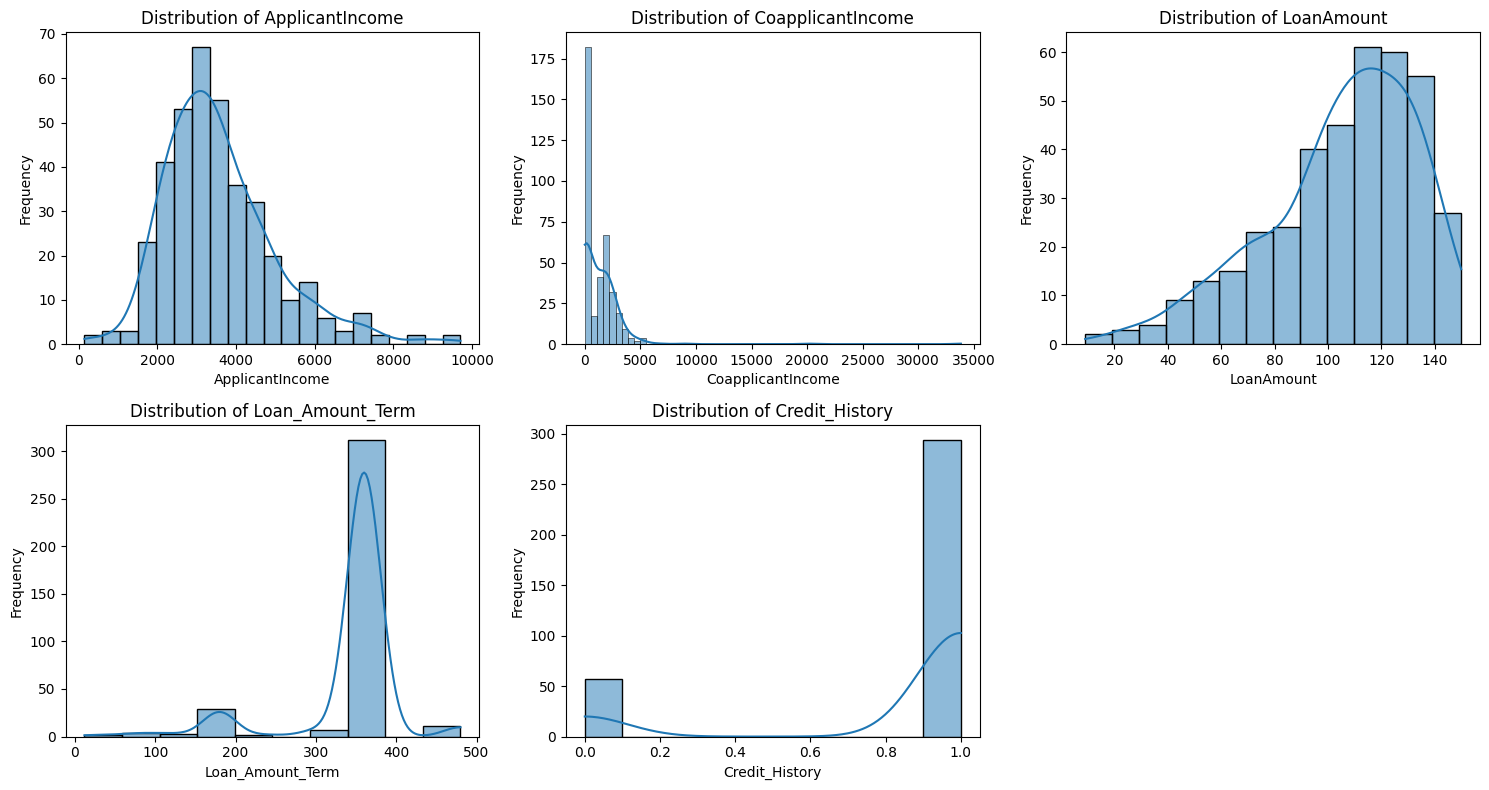

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplot grid
num_plots = len(numerical_cols)
num_cols = 3  # You can adjust this for desired layout
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True) # dropna to handle missing values for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [98]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

/tmp/ipython-input-3554240144.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [99]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

/tmp/ipython-input-3655758314.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3655758314.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [100]:
#df.isnull().sum()

In [101]:
df = df.drop('Loan_ID', axis=1)

In [102]:
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,int64
Loan_Amount_Term,float64
Credit_History,float64


In [103]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


/tmp/ipython-input-781686744.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-781686744.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [104]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [105]:
#the Categorical Data is Replaced with mode value
#the numerical values are replaced by median

In [106]:
#Now data is Cleaned...

In [107]:
#Now we Do EDA on this

In [108]:
df.shape

(381, 12)

<Axes: xlabel='Education', ylabel='count'>

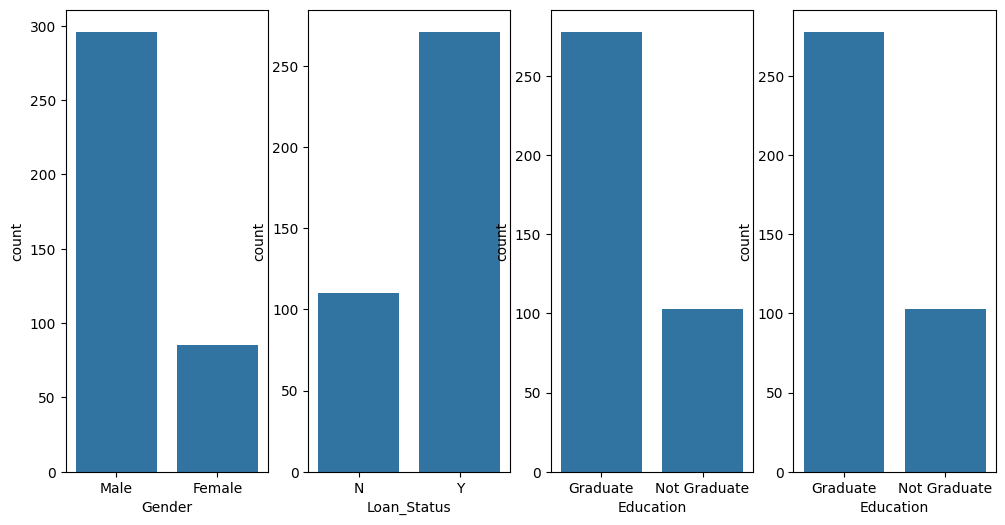

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
sns.countplot(data=df, x='Gender')
plt.subplot(1, 4, 2)
sns.countplot(data=df, x='Loan_Status')
plt.subplot(1, 4, 3)
sns.countplot(data=df, x='Education')
plt.subplot(1, 4, 4)
sns.countplot(data=df, x='Education')

In [110]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(data_frame=loan_status_count,
                         names=loan_status_count.index,
                         title='Loan Approval Status')
fig_loan_status.show()

In [111]:
fig_loan_status = px.bar(data_frame=loan_status_count,
                         x=loan_status_count.index,
                         y=loan_status_count.values,
                         title='Loan Approval Status',text=loan_status_count)
fig_loan_status.show()

In [112]:
loan_status_count

,count
Loan_Status,
Y,271
N,110


In [113]:
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(data_frame=gender_count,
                    x=gender_count.index,
                    y=gender_count.values,
                    title='Gender Distribution',text=gender_count)
fig_gender.show()

In [114]:
married_count = df['Married'].value_counts()
fig_married= px.bar(data_frame=married_count,
                    x=married_count.index,
                    y=married_count.values,
                    title='Married Distribution',text=married_count)
fig_married.show()


In [115]:
Edu_count = df['Education'].value_counts()

fig_Edu = px.bar(data_frame=Edu_count,
                 x=Edu_count.index,
                 y=Edu_count.values,
                 title='Education Distribution',text=Edu_count
                 )
fig_Edu.show()

In [116]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x=self_employed_count.index,
                           y=self_employed_count.values,
                           title='Self-Employment Distribution', text=self_employed_count)
fig_self_employed.show()

In [117]:
Dependents_count = df['Dependents'].value_counts()
fig_Dependents = px.bar(Dependents_count,
                           x=Dependents_count.index,
                           y=Dependents_count.values,
                           title='Dependent Distribution', text=Dependents_count)
fig_Dependents.show()

In [118]:
Cred_Hist_count = df['Credit_History'].value_counts()
fig_Cred_Hist = px.bar(Cred_Hist_count ,
                           x=Cred_Hist_count.index,
                           y=Cred_Hist_count.values,
                           title='Credit History Distribution', text=Cred_Hist_count)
fig_Cred_Hist.show()

In [119]:
Property_Area_count = df['Property_Area'].value_counts()
fig_Prop_Area = px.bar(Property_Area_count ,
                           x=Property_Area_count.index,
                           y=Property_Area_count.values,
                           title='Credit History Distribution', text=Property_Area_count)
fig_Prop_Area.show()

In [120]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome',
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

In [121]:
fig_Coapplicant_income = px.histogram(df, x='CoapplicantIncome',
                                    title='CoApplicant Income Distribution')
fig_Coapplicant_income.show()

In [122]:
fig_Loan_Amt = px.histogram(df, x='LoanAmount',
                                    title='Loan Amount Distribution')
fig_Loan_Amt.show()

In [123]:
print("Minimum LoanAmt: ",df['LoanAmount'].value_counts().index.min() )
print("Maximum LoanAmt: ",df['LoanAmount'].value_counts().index.max() )

Minimum LoanAmt:  9
Maximum LoanAmt:  150


In [124]:
fig_Loan_term = px.histogram(df, x='Loan_Amount_Term',
                                    title='Loan ')
fig_Loan_term.show()

In [125]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,323
180.0,29
480.0,11
300.0,7
120.0,3
84.0,3
240.0,2
60.0,1
12.0,1


In [126]:
## Now Bivariate Analysis:

In [127]:
fig_1 = px.box(df, x='Loan_Status',
                    y='ApplicantIncome',
                    color="Loan_Status",
                    title='Loan_Status vs ApplicantIncome')
fig_1.show()

In [128]:
fig_2 = px.box(data_frame=df, x='Loan_Status',
                    y='LoanAmount',
                    color="Loan_Status",
                    title='Loan_Status vs LoanAmount')
fig_2.show()

In [129]:
fig_3 = px.box(data_frame=df, x='Loan_Status',
                    y='CoapplicantIncome',
                    color="Loan_Status",
                    title='Loan_Status vs CoapplicantIncome')
fig_3.show()

In [130]:
fig_4 = px.box(data_frame=df, x='Loan_Status',
                    y='Loan_Amount_Term',
                    color="Loan_Status",
                    title='Loan_Status vs Loan_Amount_Term')
fig_4.show()

In [131]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [132]:
# Remove outliers
df=df[(df['ApplicantIncome']>=lower_bound)&(df['ApplicantIncome']<= upper_bound)]

In [133]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


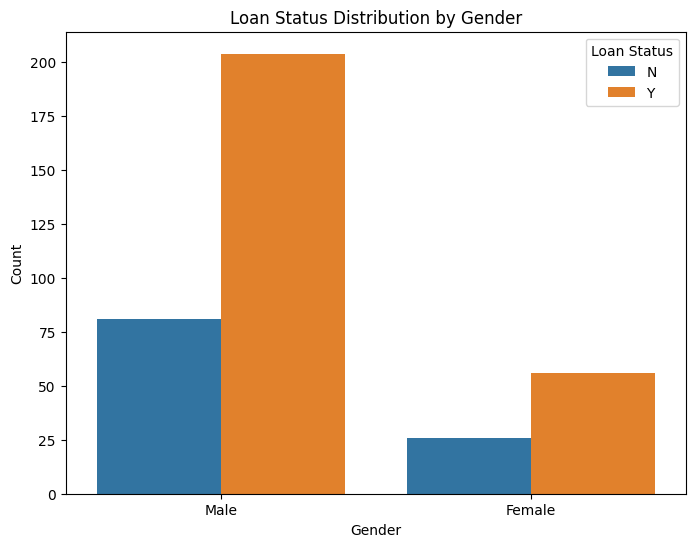

In [134]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('Loan Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

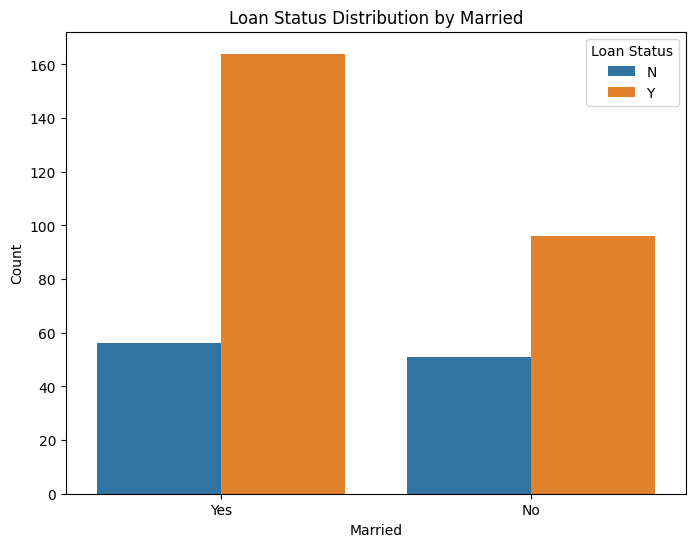

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Married',hue='Loan_Status')
plt.title('Loan Status Distribution by Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

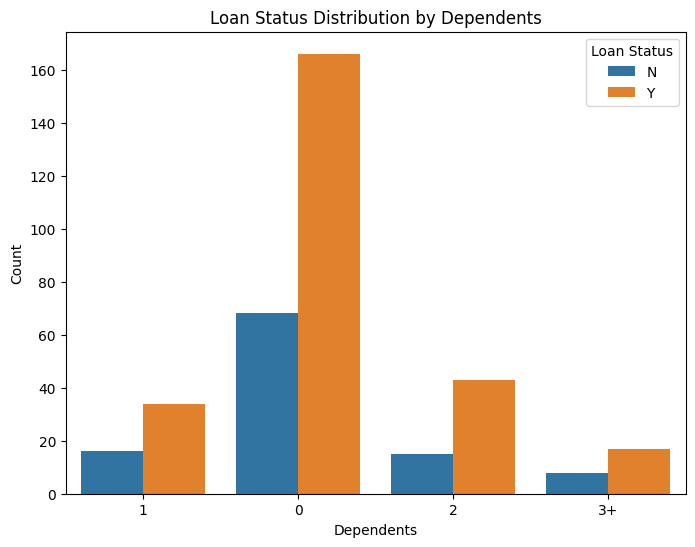

In [136]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Dependents',hue='Loan_Status')
plt.title('Loan Status Distribution by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

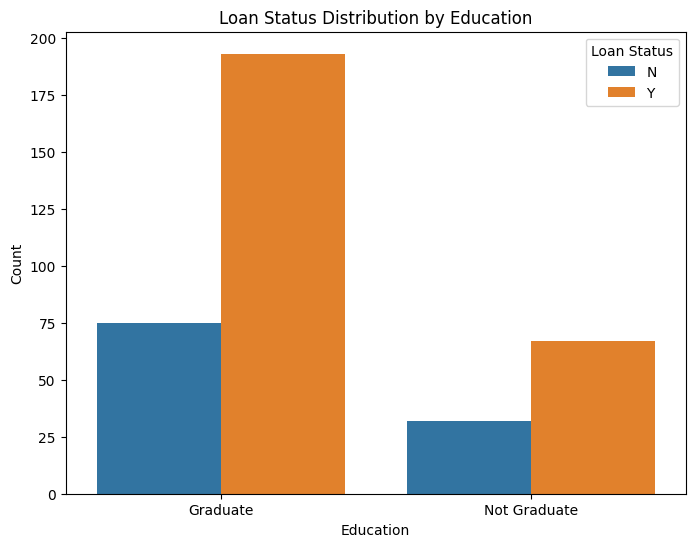

In [137]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Education',hue='Loan_Status')
plt.title('Loan Status Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

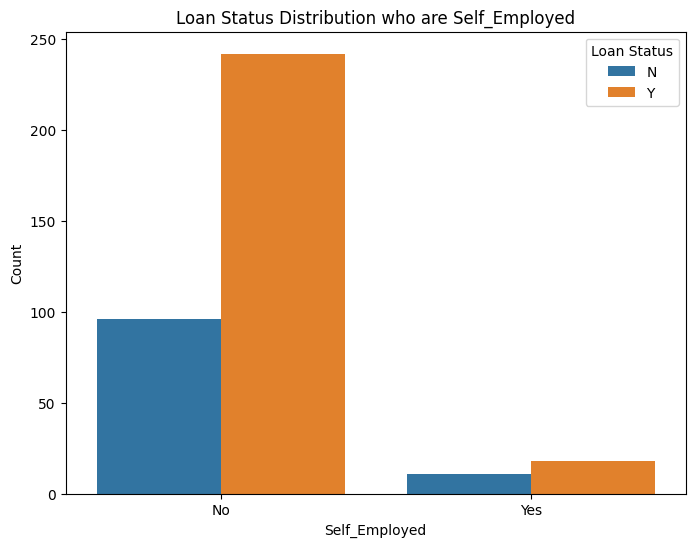

In [138]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status')
plt.title('Loan Status Distribution who are Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

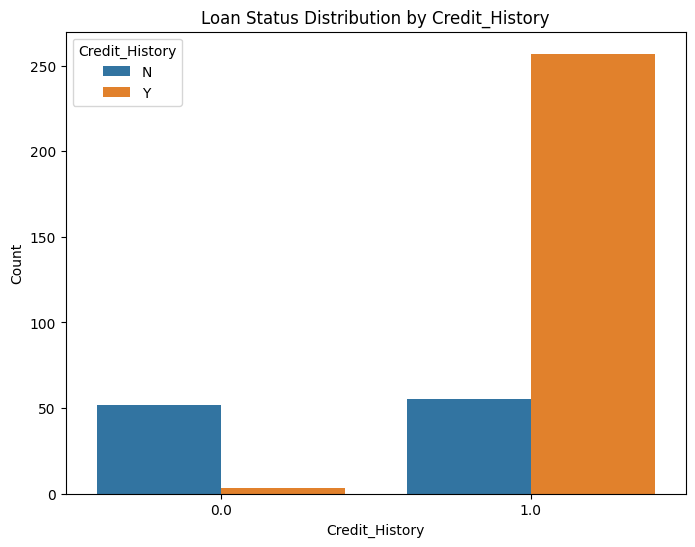

In [139]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Credit_History',hue='Loan_Status')
plt.title('Loan Status Distribution by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.legend(title='Credit_History')
plt.show()

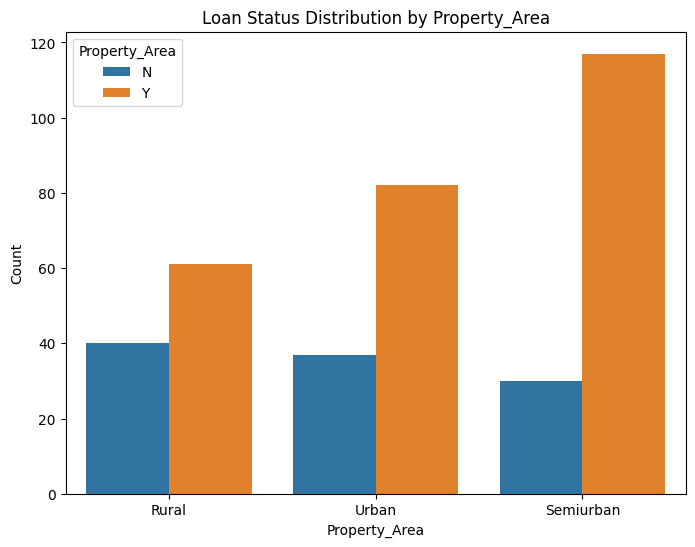

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')
plt.title('Loan Status Distribution by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.legend(title='Property_Area')
plt.show()

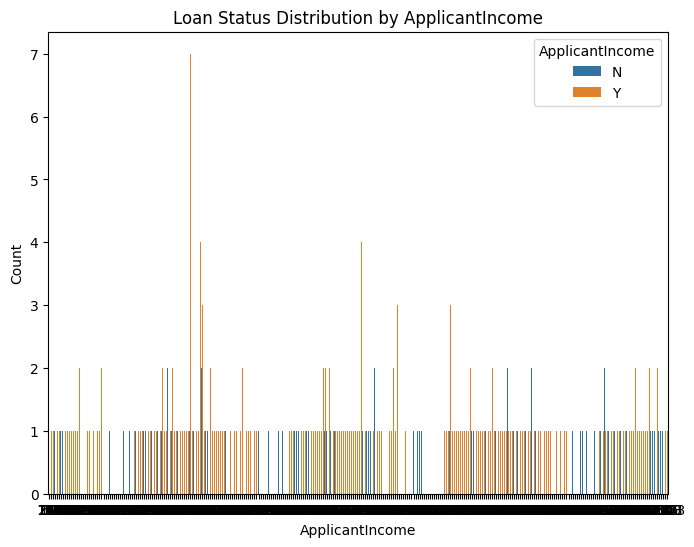

In [141]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='ApplicantIncome',hue='Loan_Status')
plt.title('Loan Status Distribution by ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.legend(title='ApplicantIncome')
plt.show()

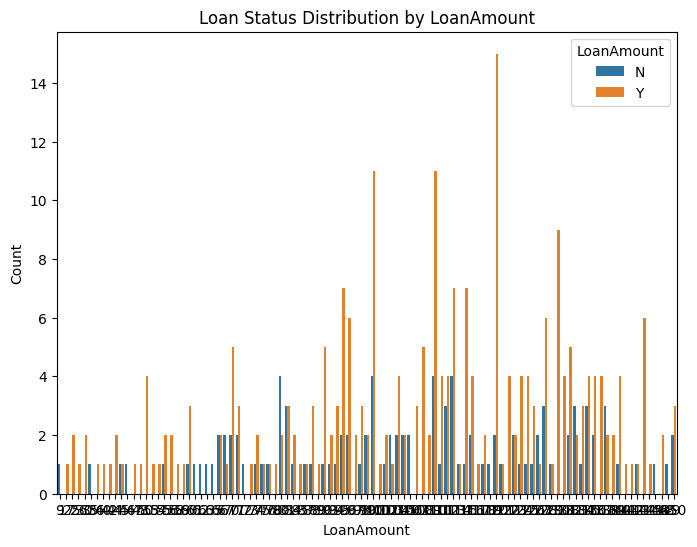

In [142]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='LoanAmount',hue='Loan_Status')
plt.title('Loan Status Distribution by LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.legend(title='LoanAmount')
plt.show()

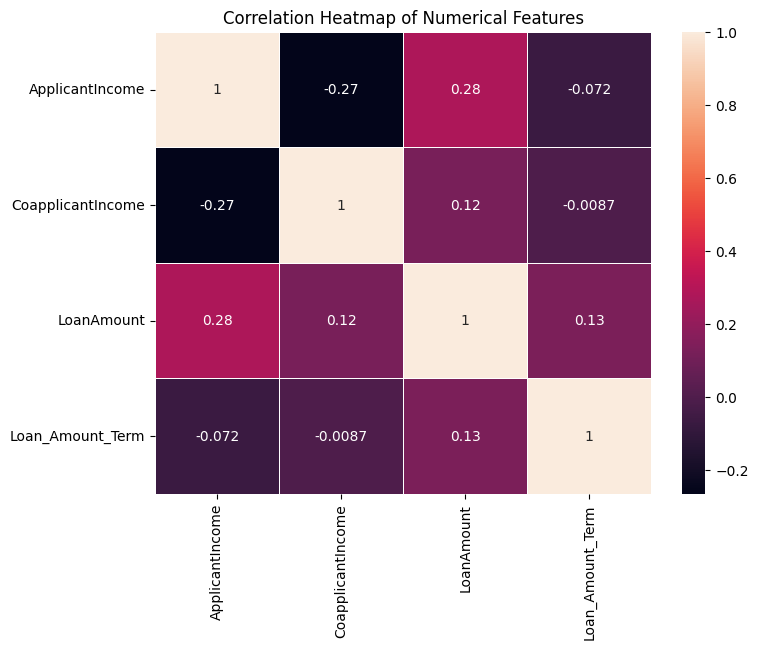

In [143]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


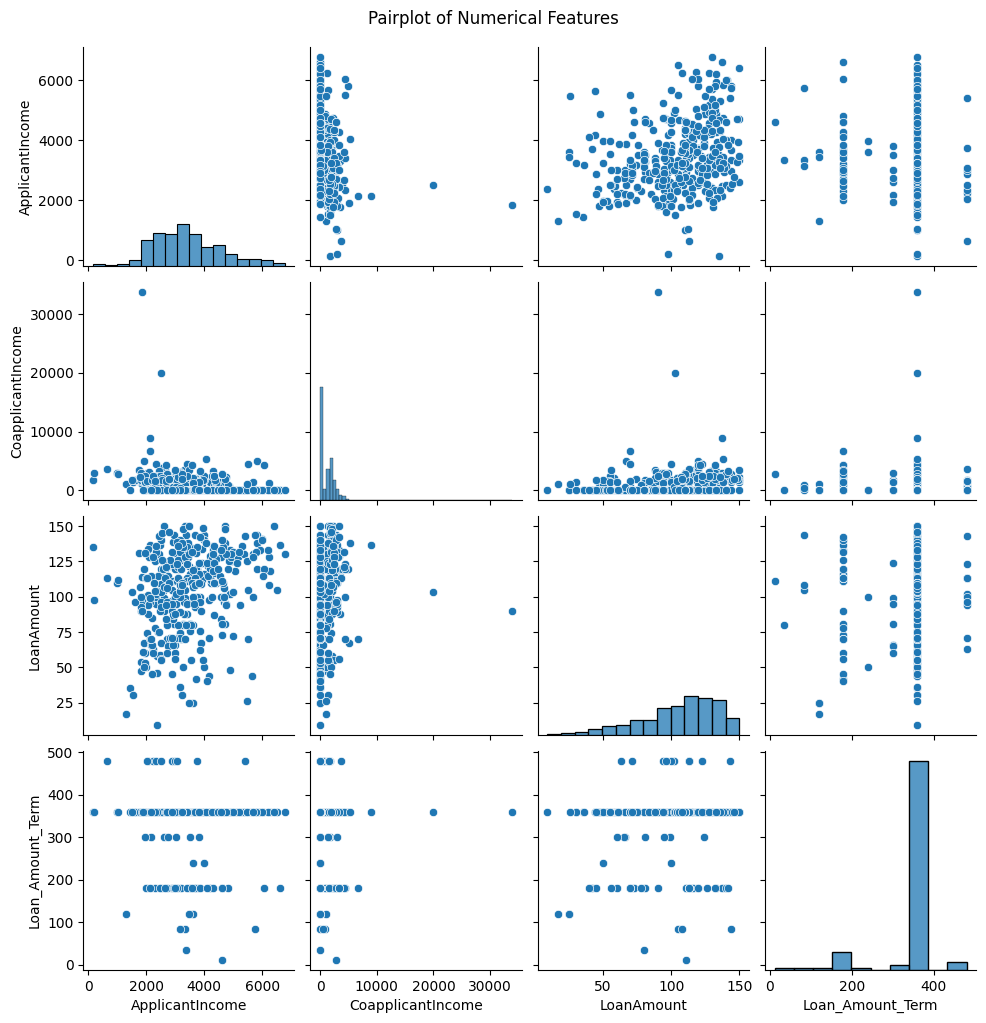

In [144]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


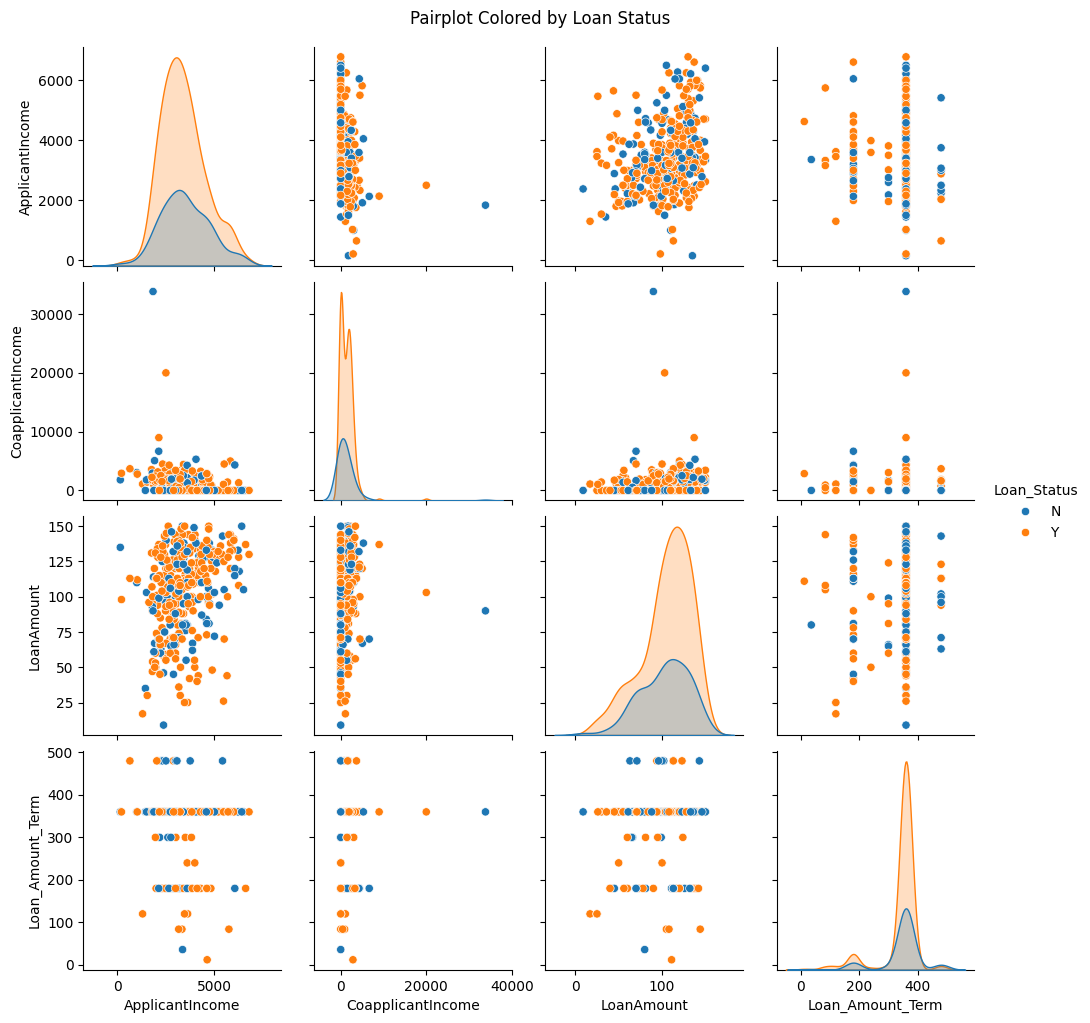

In [145]:
sns.pairplot(df, vars=numeric_cols, hue="Loan_Status")
plt.suptitle("Pairplot Colored by Loan Status", y=1.02)
plt.show()


In [146]:
print("Correlation Table:")
print(corr_matrix)


Correlation Table:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.266337    0.275108   
CoapplicantIncome        -0.266337           1.000000    0.122467   
LoanAmount                0.275108           0.122467    1.000000   
Loan_Amount_Term         -0.072387          -0.008669    0.130583   

                   Loan_Amount_Term  
ApplicantIncome           -0.072387  
CoapplicantIncome         -0.008669  
LoanAmount                 0.130583  
Loan_Amount_Term           1.000000  


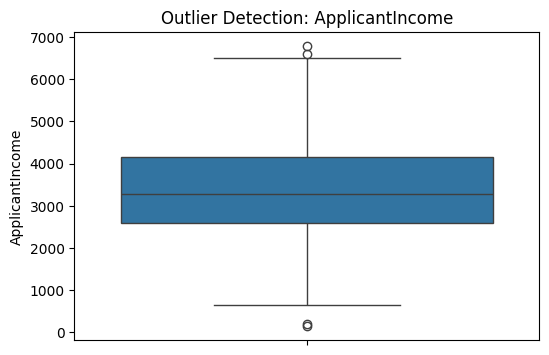

In [147]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['ApplicantIncome'])
plt.title("Outlier Detection: ApplicantIncome")
plt.show()


In [148]:
import numpy as np

def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)][column]

print("ApplicantIncome Outliers:")
print(find_outliers('ApplicantIncome'))

print("\nCoapplicantIncome Outliers:")
print(find_outliers('CoapplicantIncome'))

print("\nLoanAmount Outliers:")
print(find_outliers('LoanAmount'))


ApplicantIncome Outliers:
132     150
154    6608
299     210
334    6783
Name: ApplicantIncome, dtype: int64

CoapplicantIncome Outliers:
79      8980.0
256    20000.0
319     5302.0
324     6666.0
364    33837.0
Name: CoapplicantIncome, dtype: float64

LoanAmount Outliers:
8      17
19     35
65     25
84     25
91     30
168    30
350    26
357     9
Name: LoanAmount, dtype: int64


In [149]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df[['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome']].head()


,ApplicantIncome,CoapplicantIncome,TotalIncome
0,4583,1508.0,6091.0
1,3000,0.0,3000.0
2,2583,2358.0,4941.0
3,6000,0.0,6000.0
4,2333,1516.0,3849.0


In [150]:
df['LoanAmount'] = df['LoanAmount'].replace(0, df['LoanAmount'].median())
df['LoanAmountLog'] = np.log(df['LoanAmount'])


In [151]:
import numpy as np

df['LoanAmountLog'] = np.log(df['LoanAmount'])
df[['LoanAmount', 'LoanAmountLog']].head()


,LoanAmount,LoanAmountLog
0,128,4.852030
1,66,4.189655
2,120,4.787492
3,141,4.948760
4,95,4.553877


In [152]:
df['DTI'] = df['LoanAmount'] / df['TotalIncome']
df[['LoanAmount', 'TotalIncome', 'DTI']].head()


,LoanAmount,TotalIncome,DTI
0,128,6091.0,0.021015
1,66,3000.0,0.022000
2,120,4941.0,0.024287
3,141,6000.0,0.023500
4,95,3849.0,0.024682


In [153]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df[['LoanAmount', 'Loan_Amount_Term', 'EMI']].head()


,LoanAmount,Loan_Amount_Term,EMI
0,128,360.0,0.355556
1,66,360.0,0.183333
2,120,360.0,0.333333
3,141,360.0,0.391667
4,95,360.0,0.263889


In [154]:
df['IncomeRatio'] = df['ApplicantIncome'] / (df['CoapplicantIncome'] + 1)
df[['ApplicantIncome', 'CoapplicantIncome', 'IncomeRatio']].head()


,ApplicantIncome,CoapplicantIncome,IncomeRatio
0,4583,1508.0,3.037111
1,3000,0.0,3000.000000
2,2583,2358.0,1.094955
3,6000,0.0,6000.000000
4,2333,1516.0,1.537904


<Axes: >

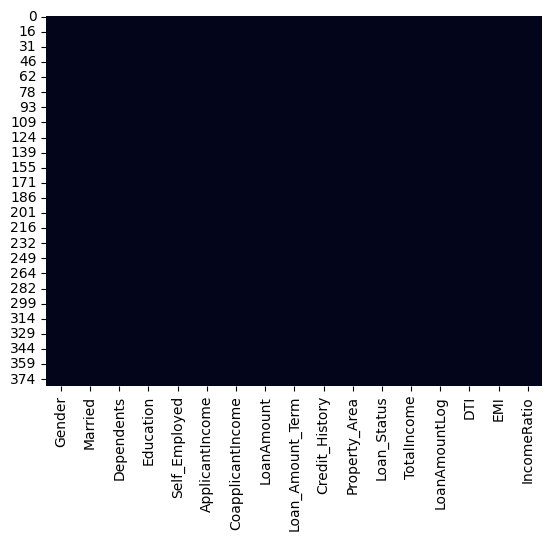

In [155]:
sns.heatmap(df.isnull(), cbar=False)